In [2]:
# Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Reading the csv file
df = pd.read_csv('AB_NYC_2019.csv')

#### Analysing the dataset

In [5]:
# Checking the number of rows and columns
df.shape

(48895, 16)

In [6]:
# Checking the column-wise info and the data type of the columns
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# Checking unique values in every columns
df.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [8]:
# Checking duplicate values in every columns
df.duplicated().sum()

0

In [9]:
# Analyse the first 5 rows of the datasets
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


### Checking the Missing Values

In [10]:
# Check the percentage of null values of the dataset
null = round(df.isna().sum()/len(df)*100,2)
null.sort_values(ascending=False)

last_review                       20.56
reviews_per_month                 20.56
host_name                          0.04
name                               0.03
id                                 0.00
host_id                            0.00
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [11]:
# Drop redundant and unnecessary columns
df.drop(['id','name'],axis=1, inplace=True)
df.isnull().sum()

host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
# Drop the last_review columns due to its redundancy
df.drop(['last_review'],axis=1, inplace=True)
df.isnull().sum()

host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##### Reviews_per_month column

In [13]:
# Check the reviews_per_month columns
df.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

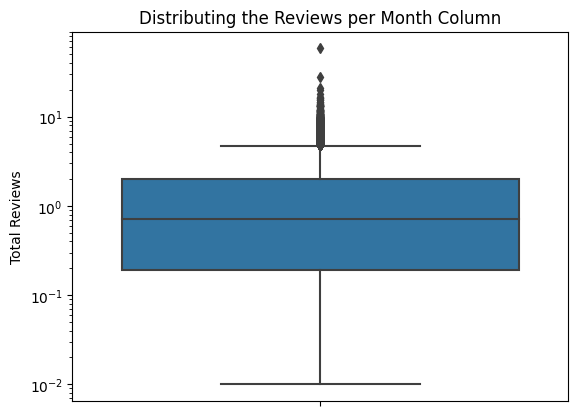

In [14]:
# Distribute the data in the column reviews_per_month
sns.boxplot(data= df, y='reviews_per_month')
plt.title('Distributing the Reviews per Month Column')
plt.yscale('log')
plt.ylabel('Total Reviews')
plt.show()

In [15]:
# Analyse the reasons of higher null values in the column against review per month
df[['number_of_reviews','reviews_per_month']][df['reviews_per_month'].isnull()].head()

,number_of_reviews,reviews_per_month
2,0,NaN
19,0,NaN
26,0,NaN
36,0,NaN
38,0,NaN


array([[<AxesSubplot: title={'center': 'reviews_per_month'}>]],
      dtype=object)

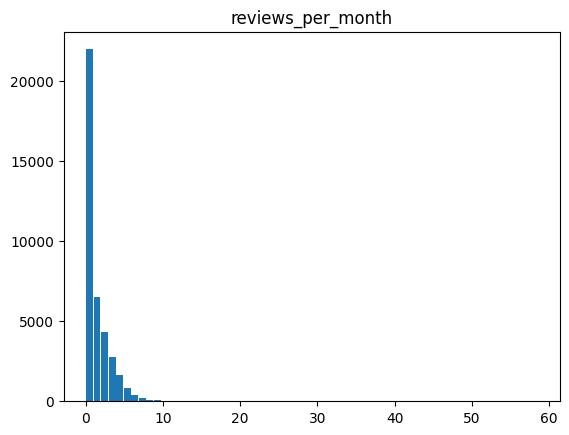

In [16]:
df.hist(column = 'reviews_per_month', bins = 60, grid = False, rwidth = .9)

In [17]:
# Replace the null values in reviews_per_month with 0
df['reviews_per_month'].fillna(value=0, inplace=True)
# Check the value after replacing with 0
df['reviews_per_month'].isnull().sum()

0

In [18]:
# Final rows and columns
df.shape

(48895, 13)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   host_name                       48874 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

#### Numerical Variables

In [20]:
# Understand the numerical variable
df_num = df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
df_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,48895.0,152.720687,240.154170,0.0,69.00,106.00,175.00,10000.0
minimum_nights,48895.0,7.029962,20.510550,1.0,1.00,3.00,5.00,1250.0
number_of_reviews,48895.0,23.274466,44.550582,0.0,1.00,5.00,24.00,629.0
reviews_per_month,48895.0,1.090910,1.597283,0.0,0.04,0.37,1.58,58.5
calculated_host_listings_count,48895.0,7.143982,32.952519,1.0,1.00,1.00,2.00,327.0
availability_365,48895.0,112.781327,131.622289,0.0,0.00,45.00,227.00,365.0


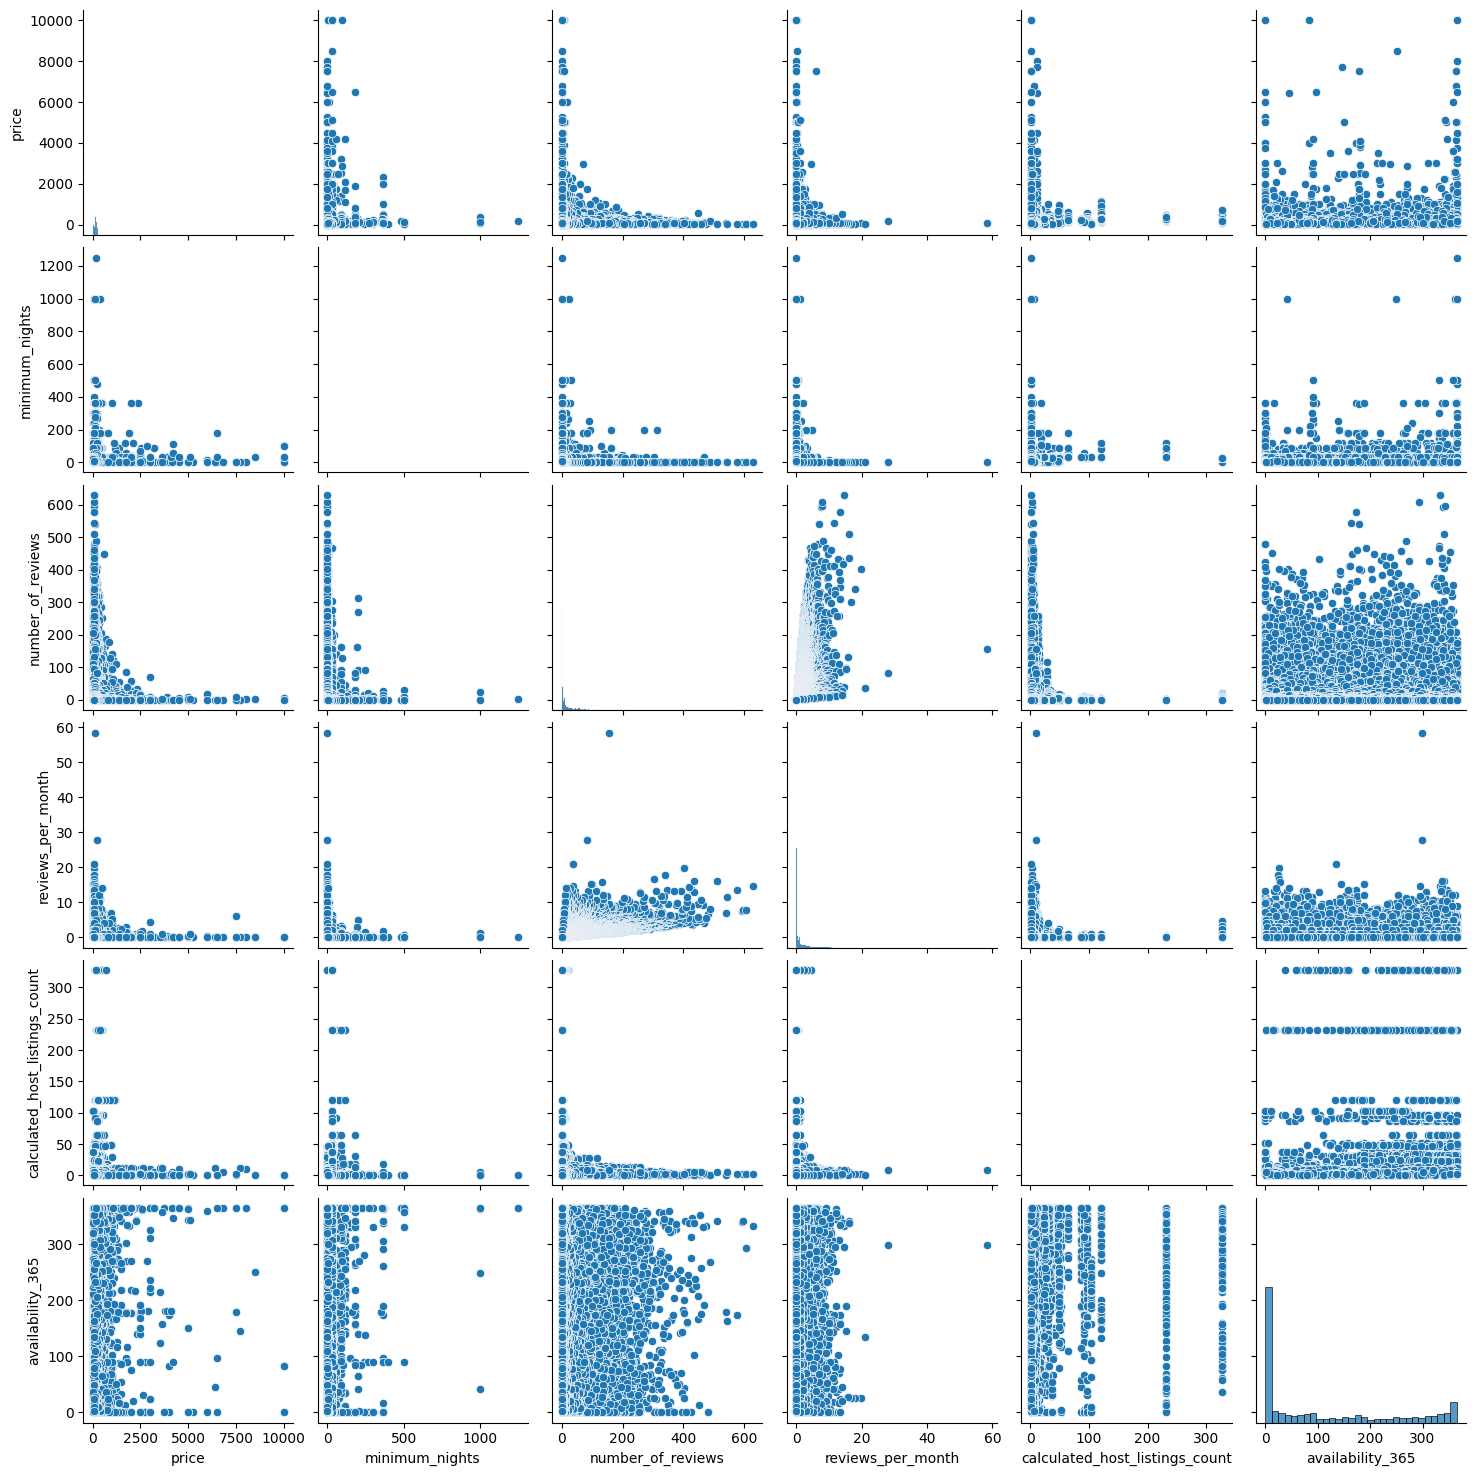

In [21]:
 # Pair plot for the numerical variables
sns.pairplot(data=df, vars = df_num)
plt.show()

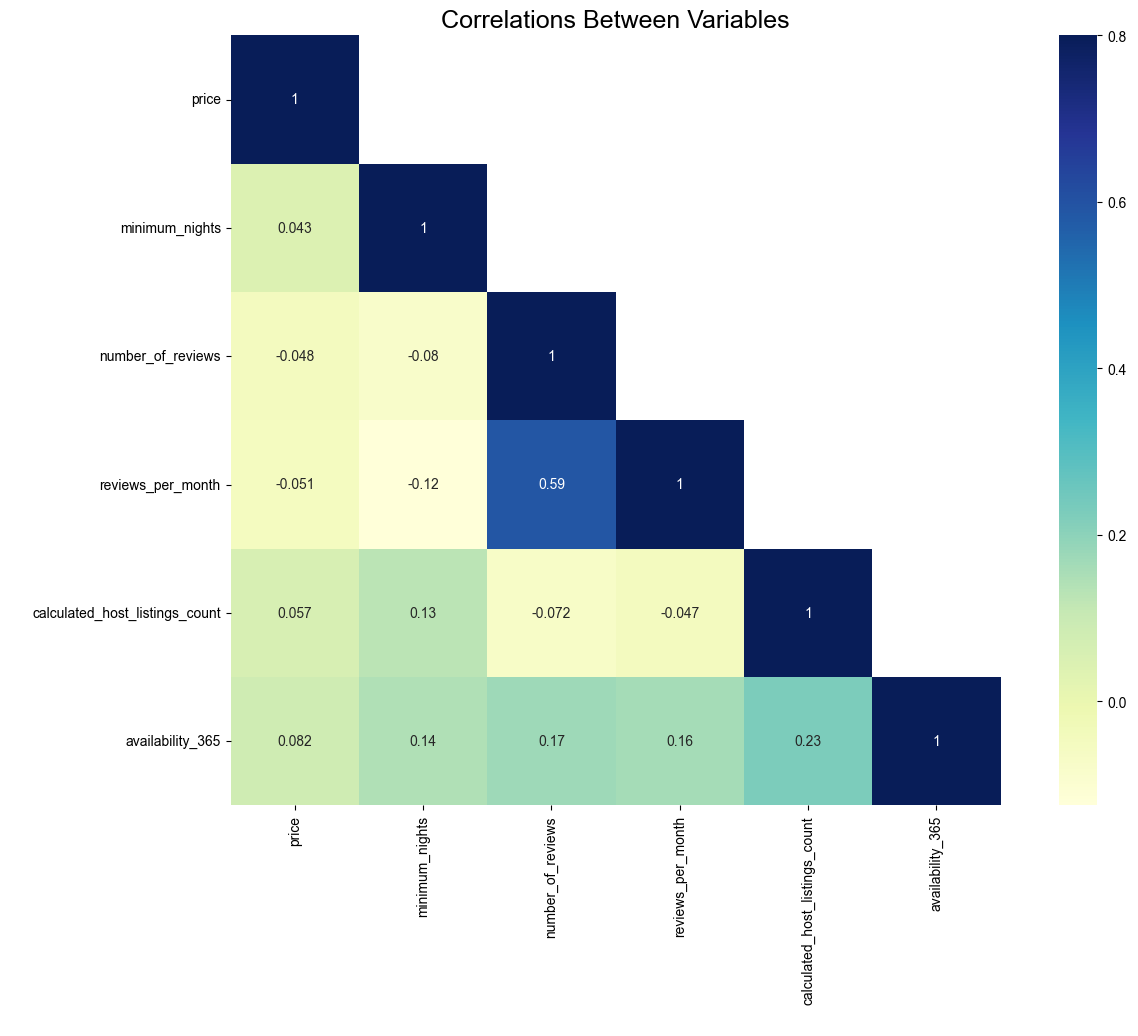

In [22]:
# Check the correlation between variables
plt.figure(figsize=(15,10))
mask = np.array(df_num.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(df_num.corr(), mask = mask, vmax = .8, square =  True, annot=True, cmap='YlGnBu')
sns.set_style('whitegrid')
sns.set_context('talk')
plt.title('Correlations Between Variables')
plt.show()

#### Checking the Outliers for Numerical Columns

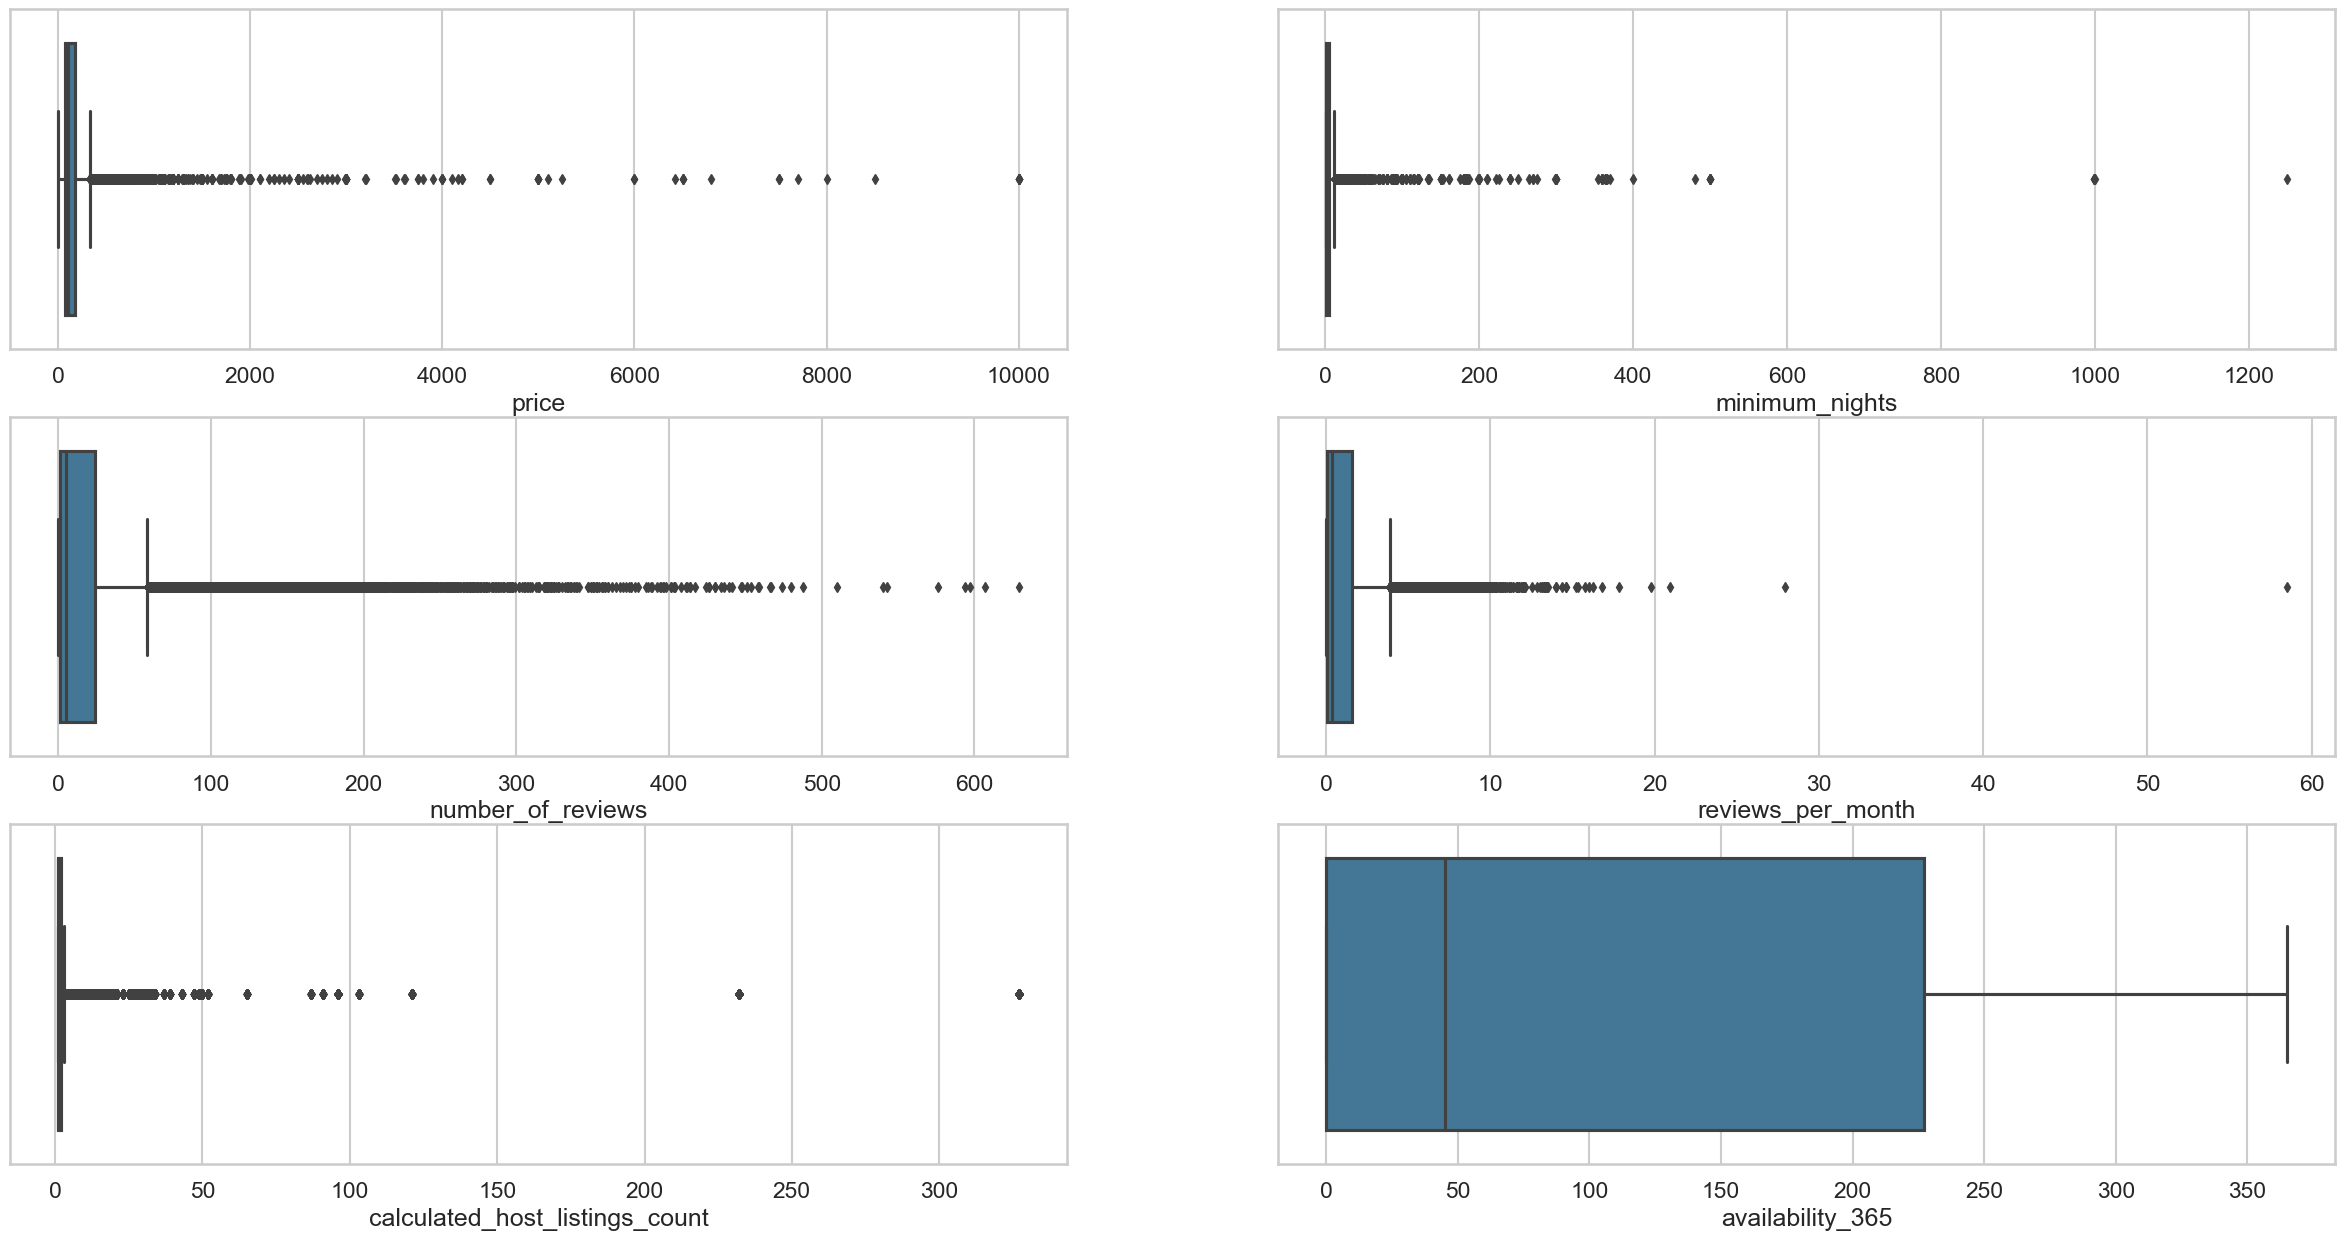

In [23]:
# Analyse outliers for numerical columms
plt.figure(figsize=(30,15))
for i in enumerate(df_num):
    plt.subplot(3,2, i[0]+1)
    sns.boxplot(x = i[1], data = df, palette='mako')

### Analysing and Treating the Outliers

####  1. Price column

In [24]:
# Analyse the description
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

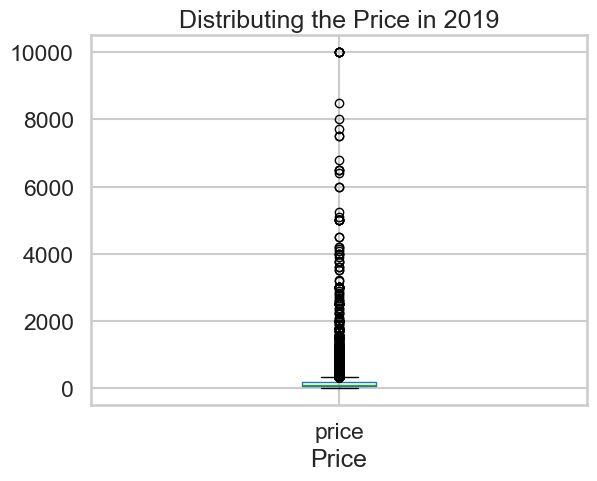

In [25]:
# Plot boxplot to see the distribution of the data in the column
df.boxplot(column = 'price')
plt.xlabel('Price')
plt.title('Distributing the Price in 2019')
plt.show()

In [26]:
# Bin the price column
df['price'].quantile([0,0.25,0.50,0.75,0.90,0.95,0.99,0.997])

0.000       0.0
0.250      69.0
0.500     106.0
0.750     175.0
0.900     269.0
0.950     355.0
0.990     799.0
0.997    1500.0
Name: price, dtype: float64

In [27]:
# Drop the value above 99.7 quantile.
df.drop(df[df['price'] > df['price'].quantile(0.997)].index, axis=0, inplace=True)

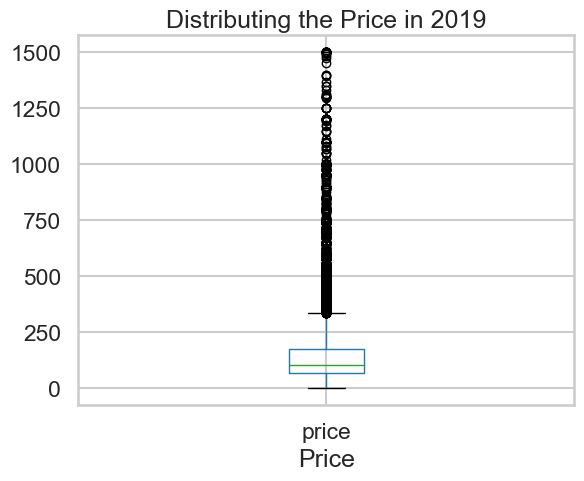

In [28]:
# Replot the boxplot after the outlier treatments
df.boxplot(column = 'price')
plt.xlabel('Price')
plt.title('Distributing the Price in 2019')
plt.show()

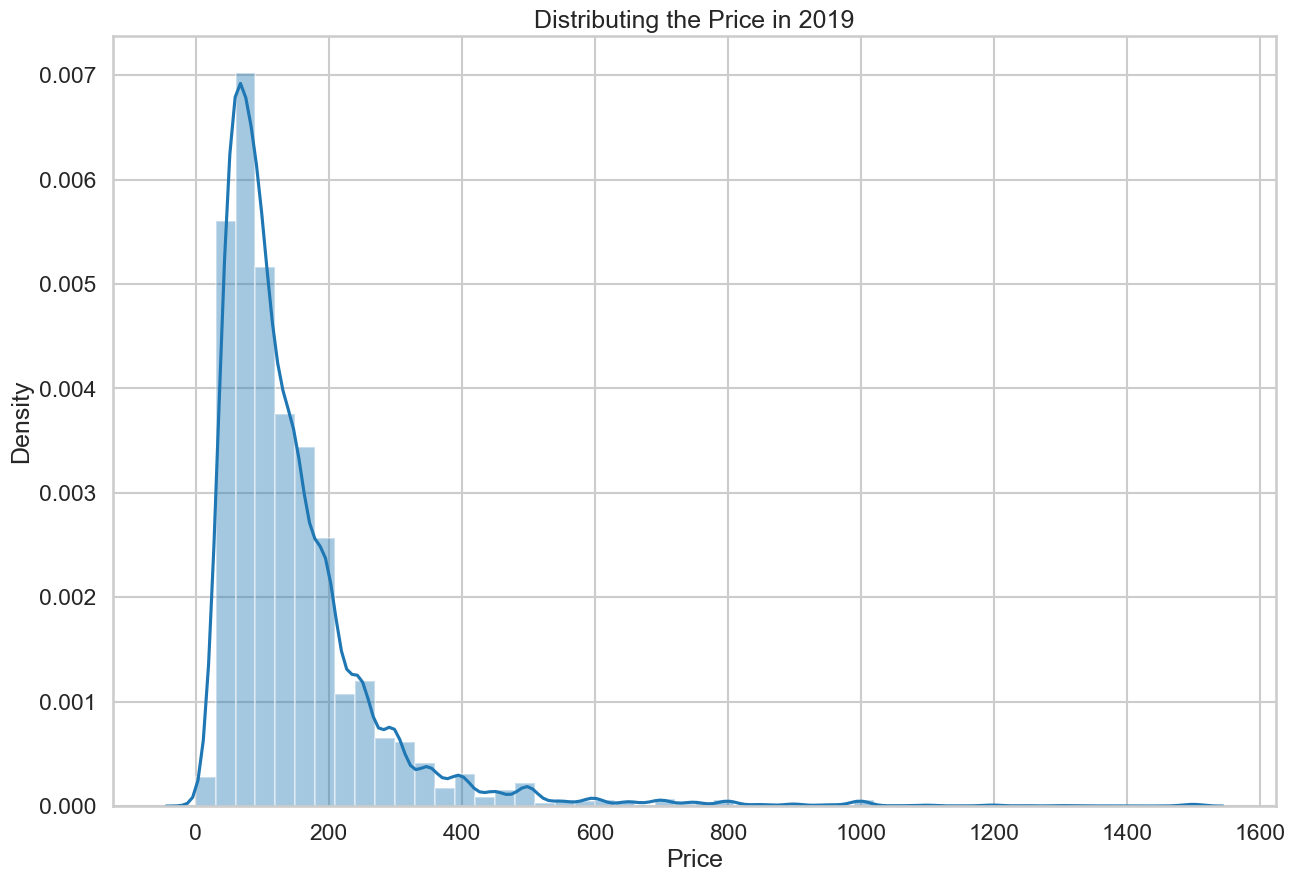

In [29]:
# Plot the displot to see the distributions
plt.figure(figsize=(15,10))
sns.distplot(df['price'])
plt.xlabel('Price')
plt.title('Distributing the Price in 2019')
plt.show()

##### 2. Minimum Nights

In [30]:
# Analyse the description
df['minimum_nights'].describe()

count    48756.000000
mean         6.983612
std         20.327452
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

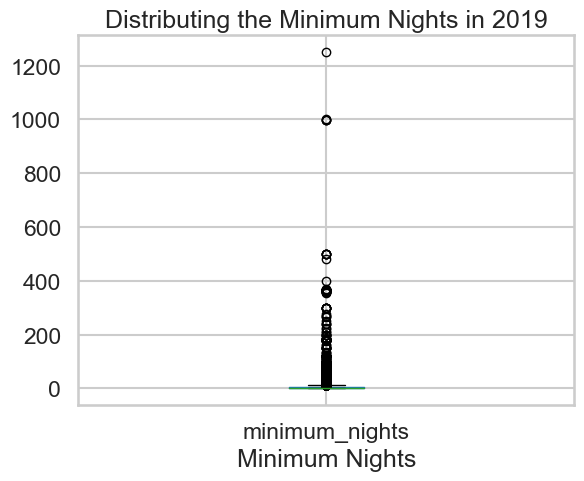

In [31]:
# Plot boxplot to see the distribution of the data in the column
df.boxplot(column = 'minimum_nights')
plt.xlabel('Minimum Nights')
plt.title('Distributing the Minimum Nights in 2019')
plt.show()

In [32]:
# Bin the Minimum Nights column
df['minimum_nights'].quantile([0,0.25,0.50,0.75,0.90,0.95,0.99,0.997])

0.000      1.00
0.250      1.00
0.500      3.00
0.750      5.00
0.900     28.00
0.950     30.00
0.990     42.45
0.997    120.00
Name: minimum_nights, dtype: float64

In [33]:
# Drop the value above 99.7 quantile.
df.drop(df[df['minimum_nights'] > df['minimum_nights'].quantile(0.997)].index, axis=0, inplace=True)

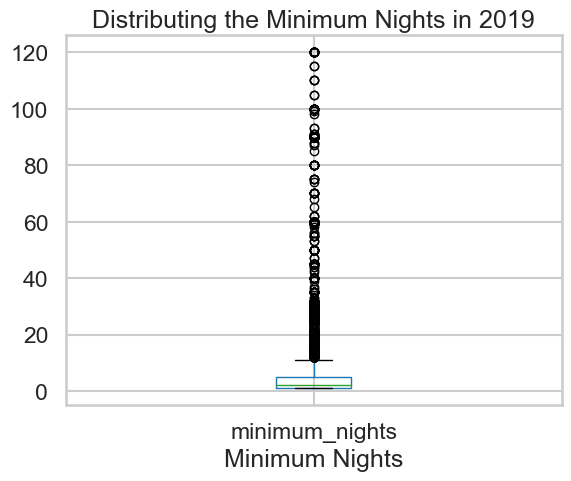

In [34]:
# Replot the boxplot after the outlier treatments
df.boxplot(column = 'minimum_nights')
plt.xlabel('Minimum Nights')
plt.title('Distributing the Minimum Nights in 2019')
plt.show()

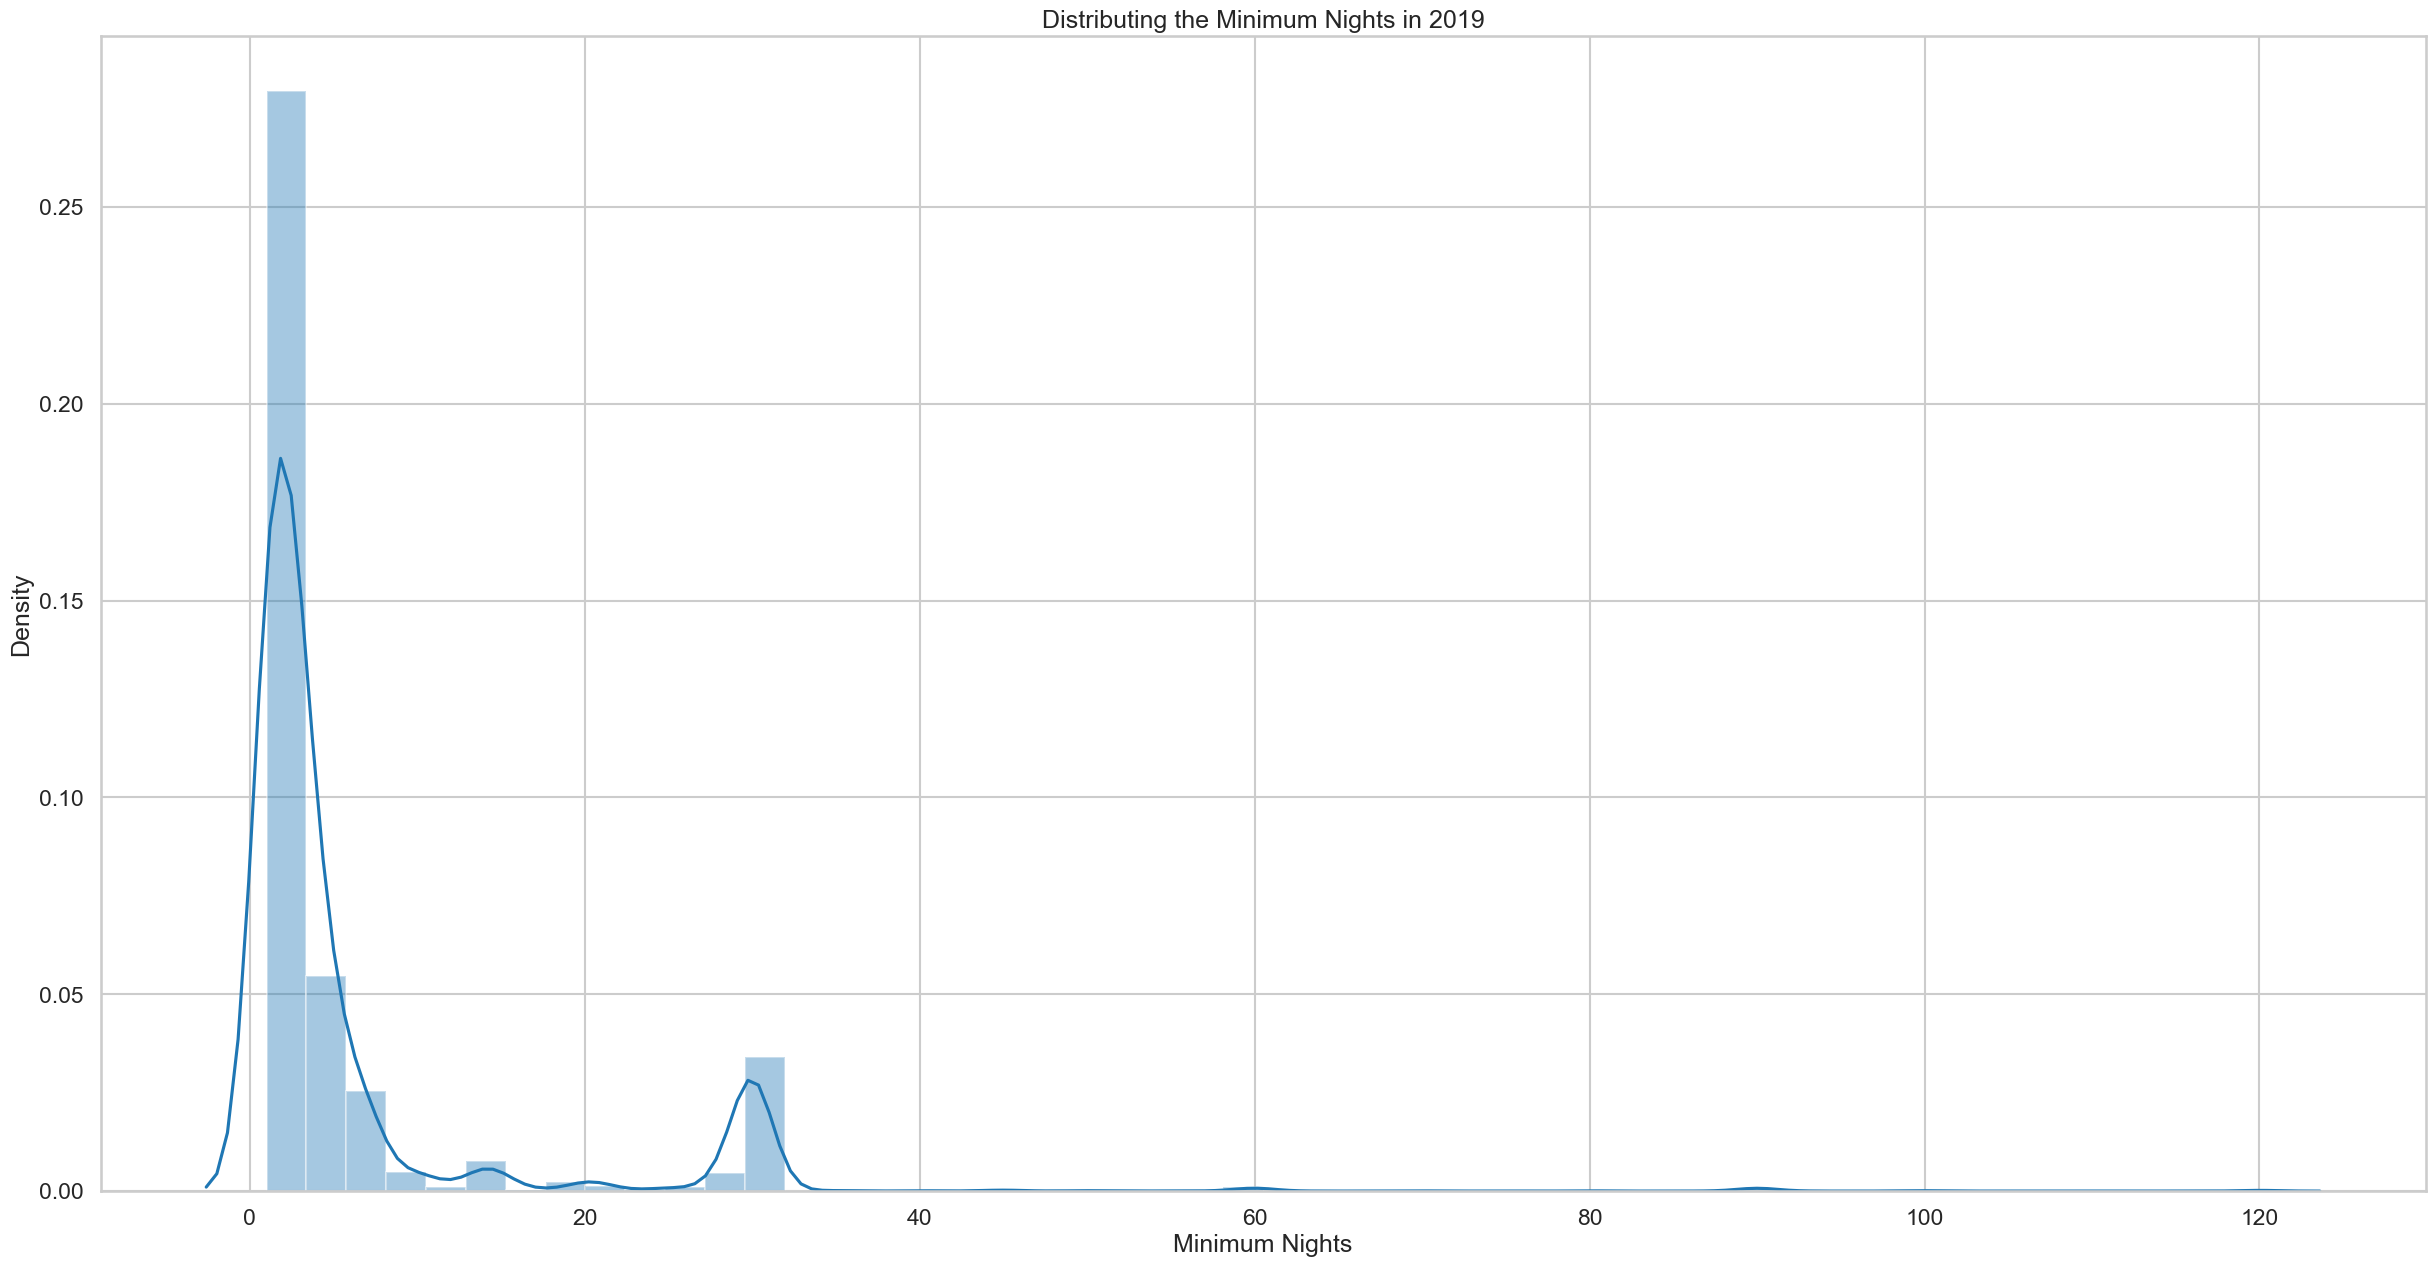

In [35]:
# Plot the displot to see the distributions
plt.figure(figsize=(30,15))
sns.distplot(df['minimum_nights'])
plt.xlabel('Minimum Nights')
plt.title('Distributing the Minimum Nights in 2019')
plt.show()

### Categorical Variables

In [36]:
# Understand the categorical variable
df_cat = df[['room_type','neighbourhood_group','neighbourhood']]

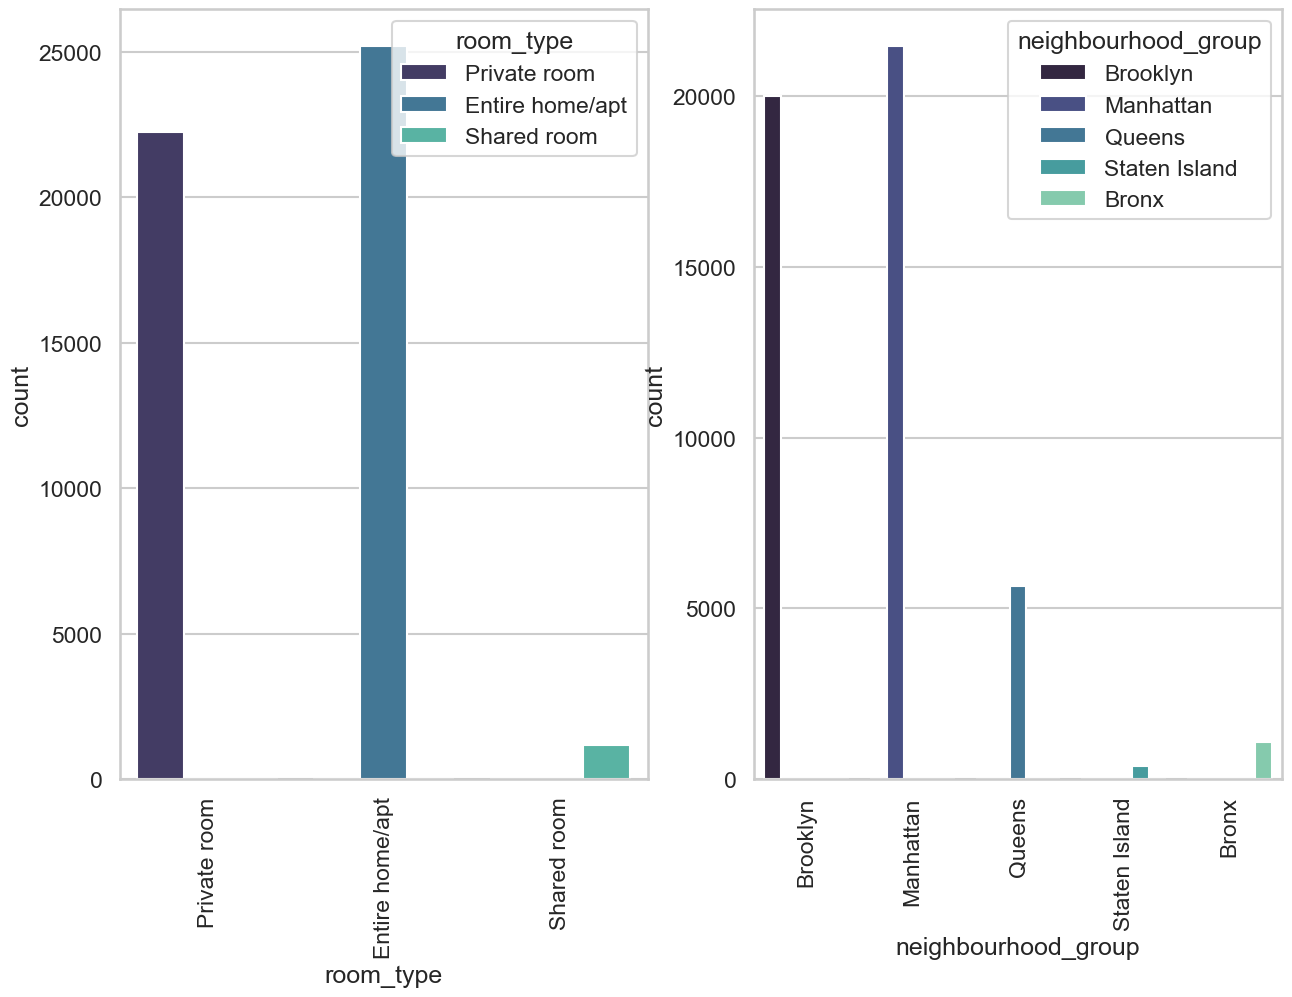

In [37]:
# Visualise the categorical variables
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(x = 'room_type',hue = 'room_type', data = df,palette="mako").tick_params(axis='x', rotation = 90)
plt.subplot(1,2,2)
sns.countplot(x='neighbourhood_group', hue = 'neighbourhood_group',data = df,palette="mako").tick_params(axis='x', rotation = 90)
sns.color_palette("tab10")
plt.show()

In [38]:
# Unique value for the neighbourhood column
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [39]:
# Check the unique value in the room_type column
df['room_type'].value_counts()

Entire home/apt    25210
Private room       22254
Shared room         1158
Name: room_type, dtype: int64

In [40]:
# Check the unique value in the neighbourhood column
df['neighbourhood'].value_counts()

Williamsburg          3902
Bedford-Stuyvesant    3703
Harlem                2648
Bushwick              2461
Hell's Kitchen        1948
                      ... 
Woodrow                  1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [41]:
# Check the unique value in the neighbourhood_group column
df['neighbourhood_group'].value_counts()

Manhattan        21486
Brooklyn         20023
Queens            5654
Bronx             1088
Staten Island      371
Name: neighbourhood_group, dtype: int64

In [42]:
df.to_csv("AB_NYC_2019_Updated.csv")
print('DataFrame is written to csv File successfully.')

DataFrame is written to csv File successfully.
